# Explorative Data Analysis of Telecom Data
 

#### Import libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load telecom dataset


In [95]:
file_path = 'Dataset\\Telco-Customer-Churn.csv'
churn_data = pd.read_csv(file_path)

## Dataset Structure and Basic Info

Here, we explore the structure of the dataset by checking the number of columns, their data types, and missing values.


In [96]:
churn_data.shape

(7043, 21)

In [97]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Column names

In [99]:
churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [100]:
churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##### Checkout the datatypes of each coloumn

In [101]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Observation:
- Data types are correct except **TotalCharges**. It was given as object when its more suitable to be a float.
- Must change the datatpye for TotalCharges


## Cleaning the data

#### Convert TotalCharges into float.

In [102]:
# Replace empty strings with NaN
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(" ", np.nan)

# Converts from object to float data type
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)


### Check for missing values in the whole Telecoms dataset

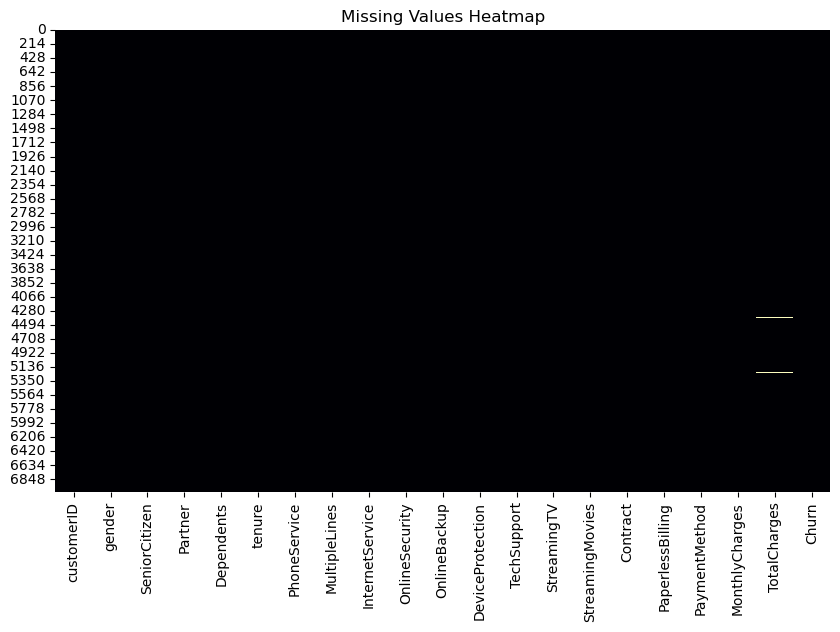

In [103]:
# heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(churn_data.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()


##### Heatmap observations
- Using heatmap we can see that there are no missing data from the dataset except **TotalChanges**
- We will explore TotalChanges even further
    

In [104]:
# check number of missing data  from TotalCharges
missing_total_charges = churn_data['TotalCharges'].isna().sum()
print(f"Number of missing TotalCharges after conversion: {missing_total_charges}")

Number of missing TotalCharges after conversion: 11


In [105]:
churn_data[np.isnan(churn_data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Looking at the data we can see tenure for these 11 coloumns are 0 which is invalid since **MonthlyCharge** is not 0 which means they were customers at the company for at least 1 month.

Investigate Tenure coloumn too see if there are more 0 values.

In [106]:
zero_tenure_rows = churn_data[churn_data['tenure'] == 0].index
print(zero_tenure_rows)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


There are no further rows that have 0 value for tenure.

##### Since we only have 11 rows missing data From Total charges we will now drop those 11 rows from our dataset.

In [107]:
churn_data = churn_data.dropna(subset=['TotalCharges'])

In [108]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now no coloumns has any missing data.

### Dropping coloumns that are redundant

We drop customerID coloumn as it is a unique identifier.

In [109]:
churn_data = churn_data.drop(['customerID'],axis = 1) 
churn_data.head()   

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Distribution

### Gender Distribution

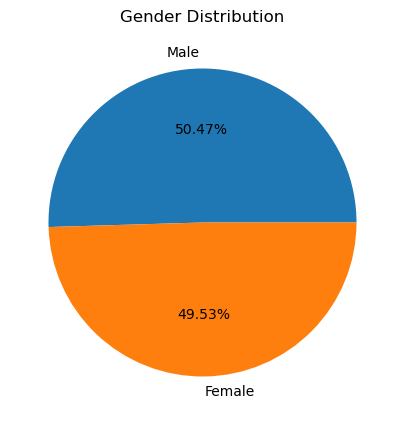

In [110]:
# Count the occurrences of each gender
gender_counts = churn_data['gender'].value_counts()


# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

- There is quite an even distribution between number of female and male customer.
- next we look at if there is any correlation with churn.

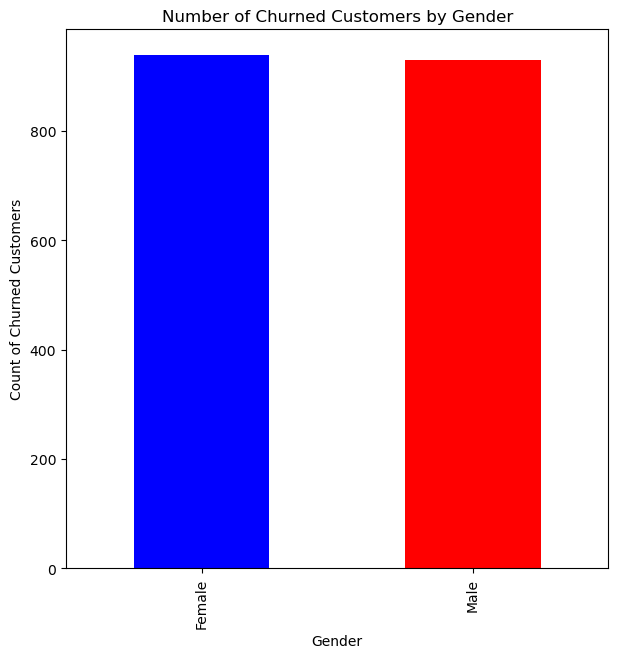

In [111]:
# Group the data to get churn counts filtered by gender
churn_by_gender = churn_data[churn_data["Churn"] == "Yes"].groupby("gender")["Churn"].count()

# Plotting
churn_by_gender.plot(kind='bar', color=["blue","red"],figsize=(7, 7)) 
plt.title('Number of Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Churned Customers')
plt.show()


##### Observation:
 The number of churners by gender is practically equal, and the t factor only differs by a very small number. 
 This suggests that gender is not a significant factor in determining churners

#### Relation of churning and Dependants

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326


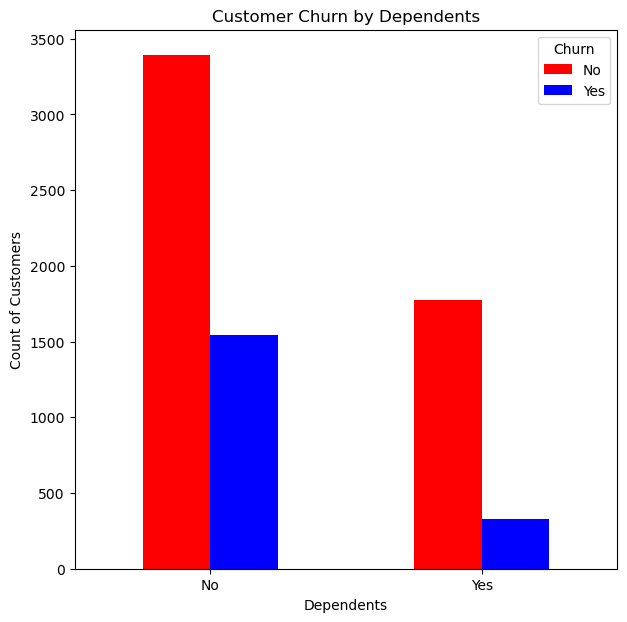

In [112]:
# Group the data to get churn counts by dependants
churn_by_dependants = churn_data.groupby([ "Dependents", "Churn"]).size().unstack()
print(churn_by_dependants)

# Plotting
churn_by_dependants.plot(kind="bar", stacked=False, color=["red", "blue"], figsize=(7, 7))
plt.title("Customer Churn by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()





#### Observation of Churn relationship with dependants:
-From this we can infer customers without dependants are much more likely to churn as compared to those with dependants. This indicates that having dependants correlates with lower churn rates.

### Relationship of churn with patment method

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


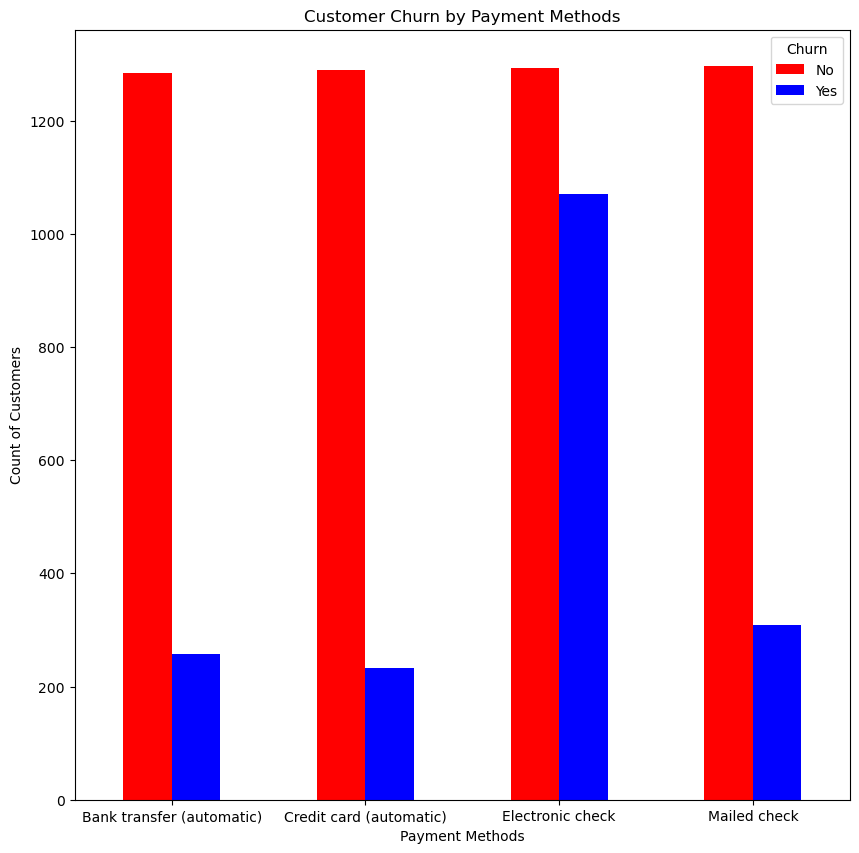

In [113]:
# Group the data to get churn counts by paymentmethod
churn_by_payment_method = churn_data.groupby(["PaymentMethod","Churn"]).size().unstack()
print(churn_by_payment_method)

# Plotting
churn_by_payment_method.plot(kind="bar", stacked=False, color=["red", "blue"], figsize=(10, 10))
plt.title("Customer Churn by Payment Methods")
plt.xlabel("Payment Methods")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()




##### Observations on Churn based by payment method:
- **Electronic check** has the highest number of churners with number of churner and non churners being very similiar.
- **Bank Transfer** and **Credit card** have the lowest rate of churners with a very small portion churning.
- **Mailed check** slightly larger number of churners as bank transfer and credit card.

Based on this we can indicate that there is a correlation of churning and automatic payment methods. Those that use auutomatic payment methods are much more likely not to churn.

### Churn relationship with internet service type

Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113


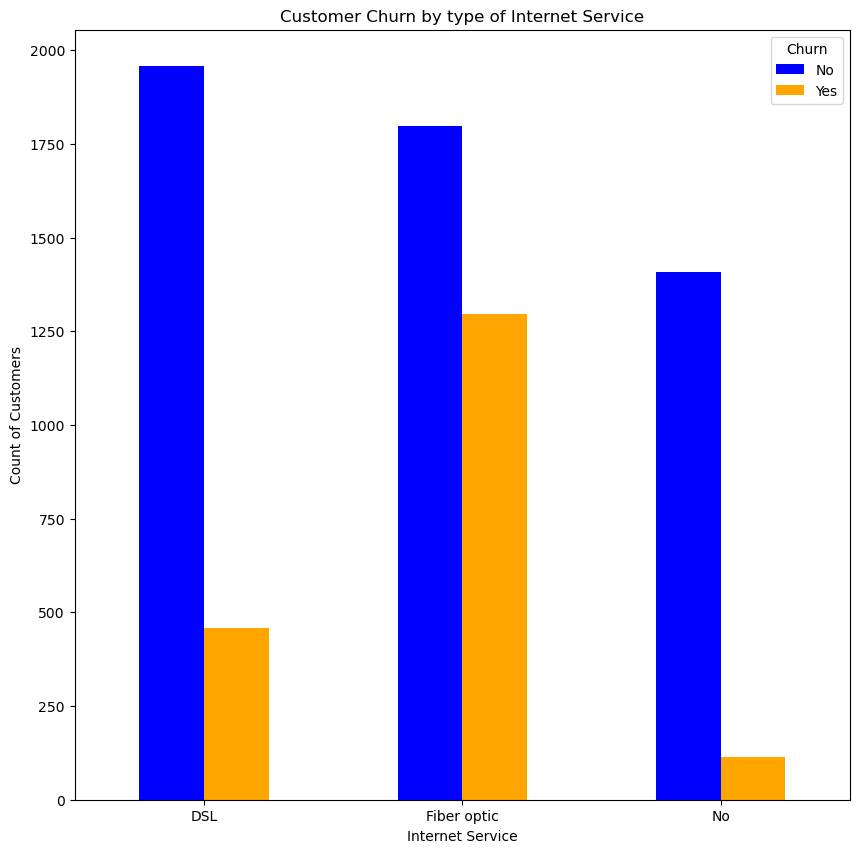

In [114]:
# Group the data to get churn counts by paymentmethod
churn_by_internet_service = churn_data.groupby(["InternetService","Churn"]).size().unstack()
print(churn_by_internet_service)

# Plotting
churn_by_internet_service.plot(kind="bar", stacked=False, color=["blue", "orange"], figsize=(10, 10))
plt.title("Customer Churn by type of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

##### Observation:
- Most customers select **Fiber optic** internet serive type and has the highest churn rate in comparison to **DSL** which has more non churners using it and a much lower chrun rate.
- This suggests that customers are dissatisfied with the fiber optic internet service provided.

#### Churn with relation to Senior Citizen

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476


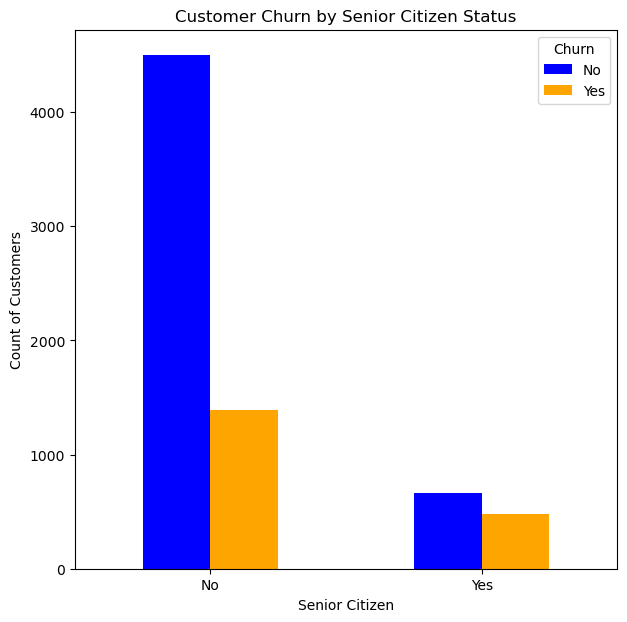

In [115]:
# Group the data to get churn counts by SeniorCitizen status
churn_by_senior_citizen = churn_data.groupby(["SeniorCitizen", "Churn"]).size().unstack()
print(churn_by_senior_citizen)

# Plotting
churn_by_senior_citizen.plot(kind="bar", stacked=False, color=["blue", "orange"], figsize=(7, 7))
plt.title("Customer Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Count of Customers")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)  #  0 = No and 1 = Yes for Senior Citizen status
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


#### Observation
- A significant number of customrs are **Not Senior Citizens** and have much lower churn rate in comparison to senior citizens
- Most of the senior citizens churn.


#### Customer churn with relation to having a partner

Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669


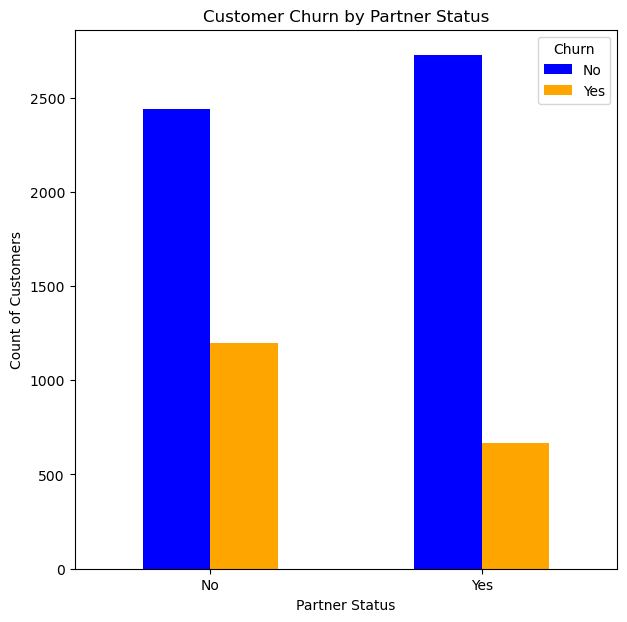

In [116]:
# Group the data to get churn counts by Partner status
churn_by_partner = churn_data.groupby(["Partner", "Churn"]).size().unstack()
print(churn_by_partner)

# Plotting
churn_by_partner.plot(kind="bar", stacked=False, color=["blue", "orange"], figsize=(7, 7))
plt.title("Customer Churn by Partner Status")
plt.xlabel("Partner Status")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#### Observation:
- Customers who have no parnetrs are much more likely to churn.
- Churn rate for those with a Partner is very low.

#### Churn with relation to Phone Service

Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


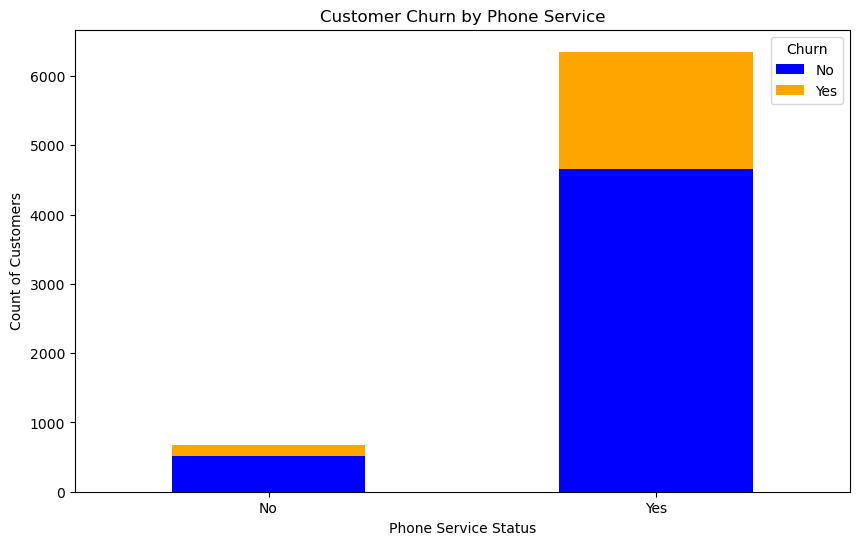

In [117]:
# Group the data to get churn counts by Phone Service
churn_by_phone_service = churn_data.groupby(["PhoneService", "Churn"]).size().unstack()
print(churn_by_phone_service)

# Plotting Phone Service
churn_by_phone_service.plot(kind="bar", stacked=True, color=["blue", "orange"],figsize=(10, 6))
plt.title("Customer Churn by Phone Service")
plt.xlabel("Phone Service Status")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0) 
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


##### Observation:
- Most customers have Phone service
- Phone service user have a higher churn count and a higher churn rate compered to those with **No Phone Service**

#### Churn with relation to Multiple Lines

Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850


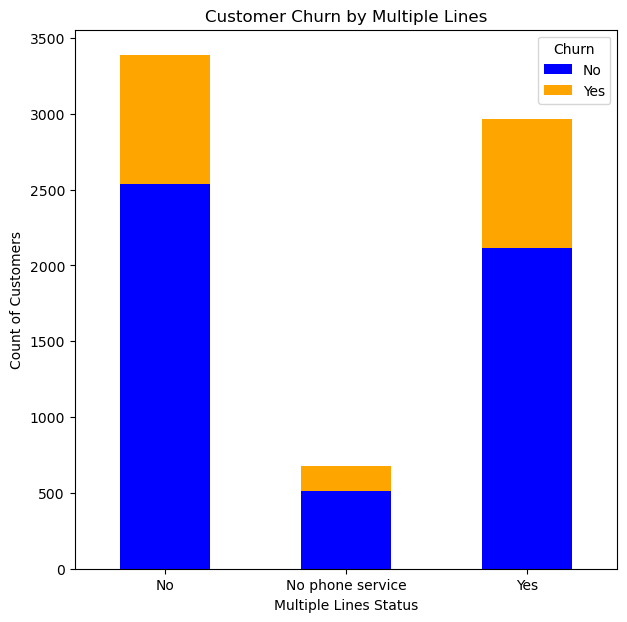

In [118]:
# Group the data to get churn counts by Multiple Lines
churn_by_multiple_lines = churn_data.groupby(["MultipleLines", "Churn"]).size().unstack()
print(churn_by_multiple_lines)

# Plotting 
churn_by_multiple_lines.plot(kind="bar", stacked=True, color=["blue", "orange"],figsize=(7, 7))
plt.title("Customer Churn by Multiple Lines")
plt.xlabel("Multiple Lines Status")
plt.ylabel("Count of Customers")
plt.xticks(rotation=0) 
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#### Observation:
- Most customers **dont** have **MultipleLines** and have **PhoneService**
- Customers without phone service have a higher churn rate , suggesting that lack of phone service significantly impacts retention.
- Customers that have multiple phone lines have similar churn rates to those with a singular phone line


#### Numerical Features